In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

#wine machine learning project
from sklearn import datasets


In [3]:
wine = datasets.load_wine()
df = pd.DataFrame(data = np.c_[wine['data'], wine['target']],
                  columns= wine['feature_names']+['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
##Correlation of alcohol between each attribute of wine.
correlation = df.corr()['alcohol'].drop('alcohol')
print(correlation)

malic_acid                      0.094397
ash                             0.211545
alcalinity_of_ash              -0.310235
magnesium                       0.270798
total_phenols                   0.289101
flavanoids                      0.236815
nonflavanoid_phenols           -0.155929
proanthocyanins                 0.136698
color_intensity                 0.546364
hue                            -0.071747
od280/od315_of_diluted_wines    0.072343
proline                         0.643720
target                         -0.328222
Name: alcohol, dtype: float64


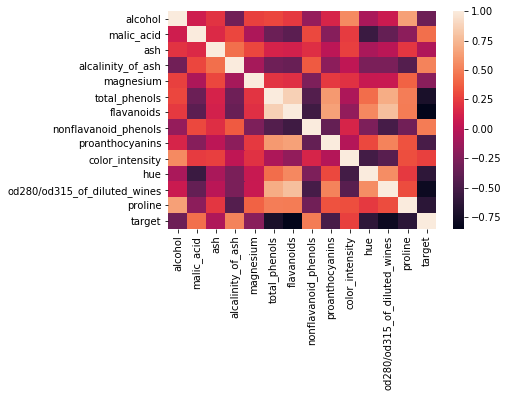

In [5]:
#display correlation 
heat_map_of_correlation = sns.heatmap(df.corr())
plt.show()

In [6]:
### define a function to output features above a threshold value.
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlations = abs_corrs
    [abs_corrs > correlation_threshold]
    new = pd.DataFrame(high_correlations).index.values.tolist()
    return new


In [7]:
#vector x containing input features and y containing alcohol variable. For use in training
    
features = get_features(0.05)#threshold value is arbitrary
print(features)

x = df[features]
y = df['alcohol']

['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


In [8]:
#test_train setup
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

#fit linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#coefficients of 10 features w. highest alcohol content
regressor.coef_
#train data
train_pred = regressor.predict(x_train)
print(train_pred)

[13.86881364 14.32216187 13.16539363 13.2525364  12.46561186 13.56868765
 13.34921741 13.5504077  13.08915549 12.04696753 12.29740072 12.30148573
 12.39905592 13.90184383 13.04930848 13.44922644 12.11733734 13.37118129
 13.78660072 13.19744682 12.85576314 13.6974221  12.32228766 12.61477492
 13.87351556 12.32670053 13.92989284 13.34412532 12.69046033 13.88387882
 12.3816234  12.70573676 13.62886674 12.58596374 12.11720327 12.8208731
 12.47630894 12.39943568 13.91912844 13.72271295 13.36855284 13.19286694
 13.10068498 13.81661485 12.74123086 11.80054892 13.53163448 13.74324754
 13.69236662 13.62541427 12.34671812 12.96248341 12.68028261 12.4705102
 12.0117594  13.31485509 13.48937805 13.53843506 12.70201338 13.65426234
 13.9932608  12.52038939 13.01581251 13.70028634 13.59007113 13.46288662
 13.71576727 12.51060656 12.51437    13.64502427 12.67456177 13.10500191
 12.16713847 12.36818087 13.39305018 12.06313298 13.86061528 12.50618158
 12.34131708 12.62910908 12.20501331 13.36603656 12.4

In [10]:
#test data
test_pred = regressor.predict(x_test)
print(test_pred)

[13.49598167 14.15507639 13.48711251 12.1692804  13.50000297 13.40217613
 13.74262612 12.33715258 12.56509323 13.3203596  12.528014   14.22433724
 12.28741309 12.64654574 13.76016455 13.87174902 12.13793008 14.28644901
 12.82730977 12.82969699 13.76690143 12.81642099 13.2084283  13.51863535
 12.1588894  12.23608322 13.4954501  13.57211454 12.14665506 12.97493473
 12.98754448 13.36140189 12.35982145 12.31860128 12.01704517 12.15877261
 13.56628047 12.58611112 14.02571973 12.83735749 14.11651383 12.8994589
 12.54498129 12.33650643 12.68336269]


In [16]:

###root mean squared error calculation. If test>train, data is overfitted.
train_rmse = metrics.mean_squared_error(train_pred, y_train)** 0.5
print(train_rmse)

test_rmse = metrics.mean_squared_error(test_pred, y_test)**0.5
print(test_rmse)

0.49838131848906775
0.5469390432503023


In [17]:
#round off predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[13. 14. 13. 12. 14. 13. 14. 12. 13. 13. 13. 14. 12. 13. 14. 14. 12. 14.
 13. 13. 14. 13. 13. 14. 12. 12. 13. 14. 12. 13. 13. 13. 12. 12. 12. 12.
 14. 13. 14. 13. 14. 13. 13. 12. 13.]


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))


Mean Absolute Error: 0.40089946199153004
Mean Squared Error: 0.299142317031556
Root Mean Squared Error: 0.5469390432503023


In [19]:

coeffecients = pd.DataFrame(regressor.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)


                              Coeffecient
malic_acid                       0.146177
ash                              0.148035
alcalinity_of_ash               -0.029664
magnesium                        0.001489
total_phenols                    0.036806
flavanoids                      -0.176020
nonflavanoid_phenols             0.371827
proanthocyanins                 -0.077715
color_intensity                  0.183995
hue                              0.346620
od280/od315_of_diluted_wines     0.035958
proline                          0.000649
target                          -0.488855
